### DATA DESCRIPTION: 


The data set of real estate valuation are collected from a city.


### ATTRIBUTES:

 The inputs are as follows

 X1=the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

 X2=the house age (unit: year)

 X3=the distance to the nearest MRT station (unit: meter)

 X4=the number of convenience stores in the living circle on foot (integer)

 X5=the geographic coordinate, latitude. (unit: degree)

 X6=the geographic coordinate, longitude. (unit: degree)

 The output is as follows

o Y= house price of unit area

### 1.	 Read the dataset (tab, csv, xls, txt, inbuilt dataset) 

In [ ]:
## Kindly change the below cells from markdown to code and execute it 

In [418]:
import pandas as pd

import csv

with open("data_set.csv","r")as file:
    
    reader=csv.reader(file)

df=pd.read_csv("data_set.csv")

df.head()


,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [185]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor

### 2.	Summarize important observations from the data set 

Some pointers which would help you, but don’t be limited by these

a.	What are the number of rows; no. & types of variables (continuous, categorical etc.)

b.	Calculate five point summary for numerical variables

c.	Summarize observations for categorical variables – no. of categories, % observations in each category


In [3]:
df.shape

(414, 8)

In [4]:
# The number of rows is 414, Number of columns is 8

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [7]:
# There are 8 columns and all are numerical in nature

5 point Summary

In [8]:
df.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [9]:
df.median()

No                                         207.50000
X1 transaction date                       2013.16700
X2 house age                                16.10000
X3 distance to the nearest MRT station     492.23130
X4 number of convenience stores              4.00000
X5 latitude                                 24.97110
X6 longitude                               121.53863
Y house price of unit area                  38.45000
dtype: float64

1. The Median for the values
2. The Min value
3. The Max value
4. The 25 quantile
5. The 75 quantile

In [15]:
df.select_dtypes(include='object')

""
0
1
2
3
4
5
6
7
8
9


In [16]:
# There are no categorical feature available

### 3.	Check for defects in the data. Perform necessary actions to ‘fix’ these defects

Some pointers which would help you, but don’t be limited by these

a.	Do variables have missing/null values?

b.	Do variables have outliers?

c.	Is the data normally distributed? Is it a defect? Why or why not? 


In [19]:
# Checking for missing value

In [20]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

In [21]:
# There are no null values in the dataset 

In [22]:
# Checking Outlier

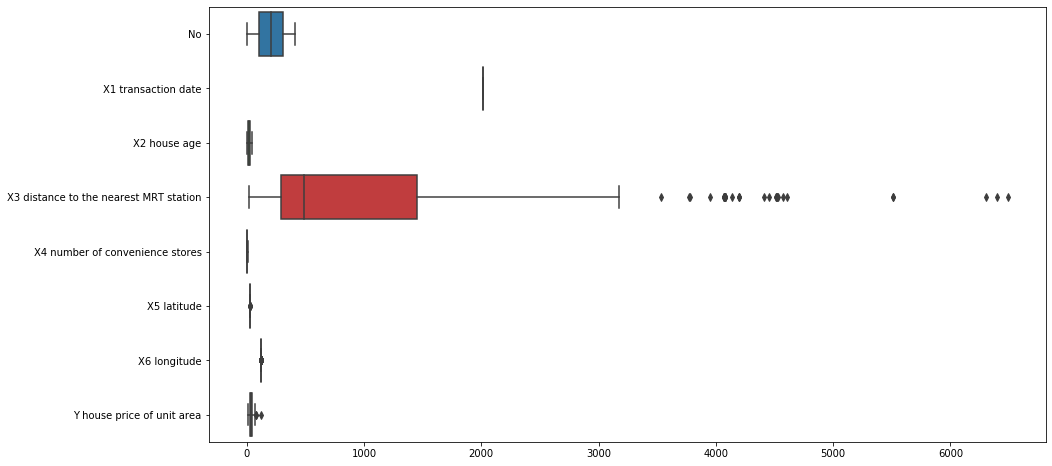

In [26]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,orient='h')

In [37]:
# We can observe extreme values in X3 distance to the nearest MRT station checking if they are outlier

In [28]:
q1=df.quantile(0.25)
q3=df.quantile(0.75)
iqr=q3-q1
ll = q1 - (1.5*iqr)
ul= q3+(1.5*iqr)

In [44]:
df2 = df[~((df>ll)| (df<ul)).any(axis=1)]

In [45]:
df2.shape

(0, 8)

In [46]:
# As we can observe from the result of IQR there are no outliers but extreme values

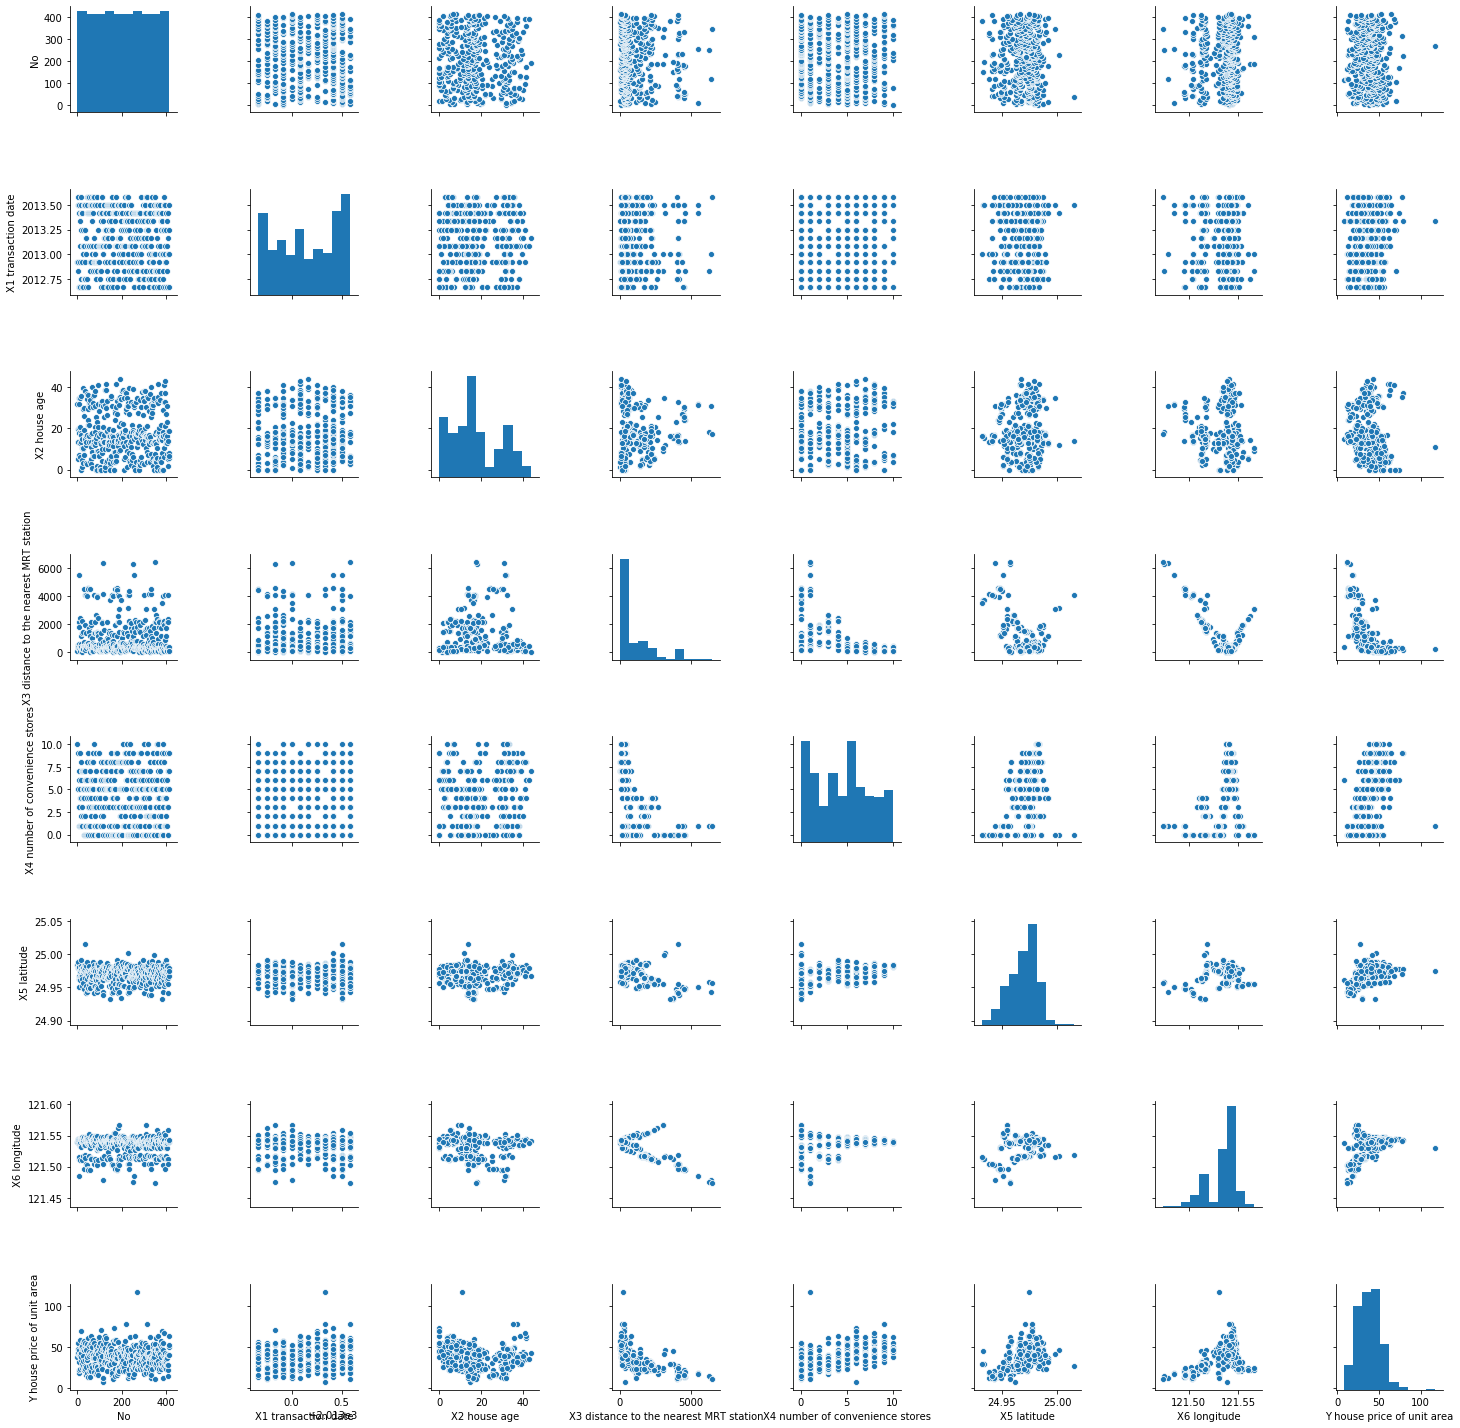

In [47]:
sns.pairplot(df)

In [49]:
df.skew()

No                                        0.000000
X1 transaction date                      -0.150572
X2 house age                              0.382926
X3 distance to the nearest MRT station    1.888757
X4 number of convenience stores           0.154607
X5 latitude                              -0.438598
X6 longitude                             -1.219591
Y house price of unit area                0.599853
dtype: float64

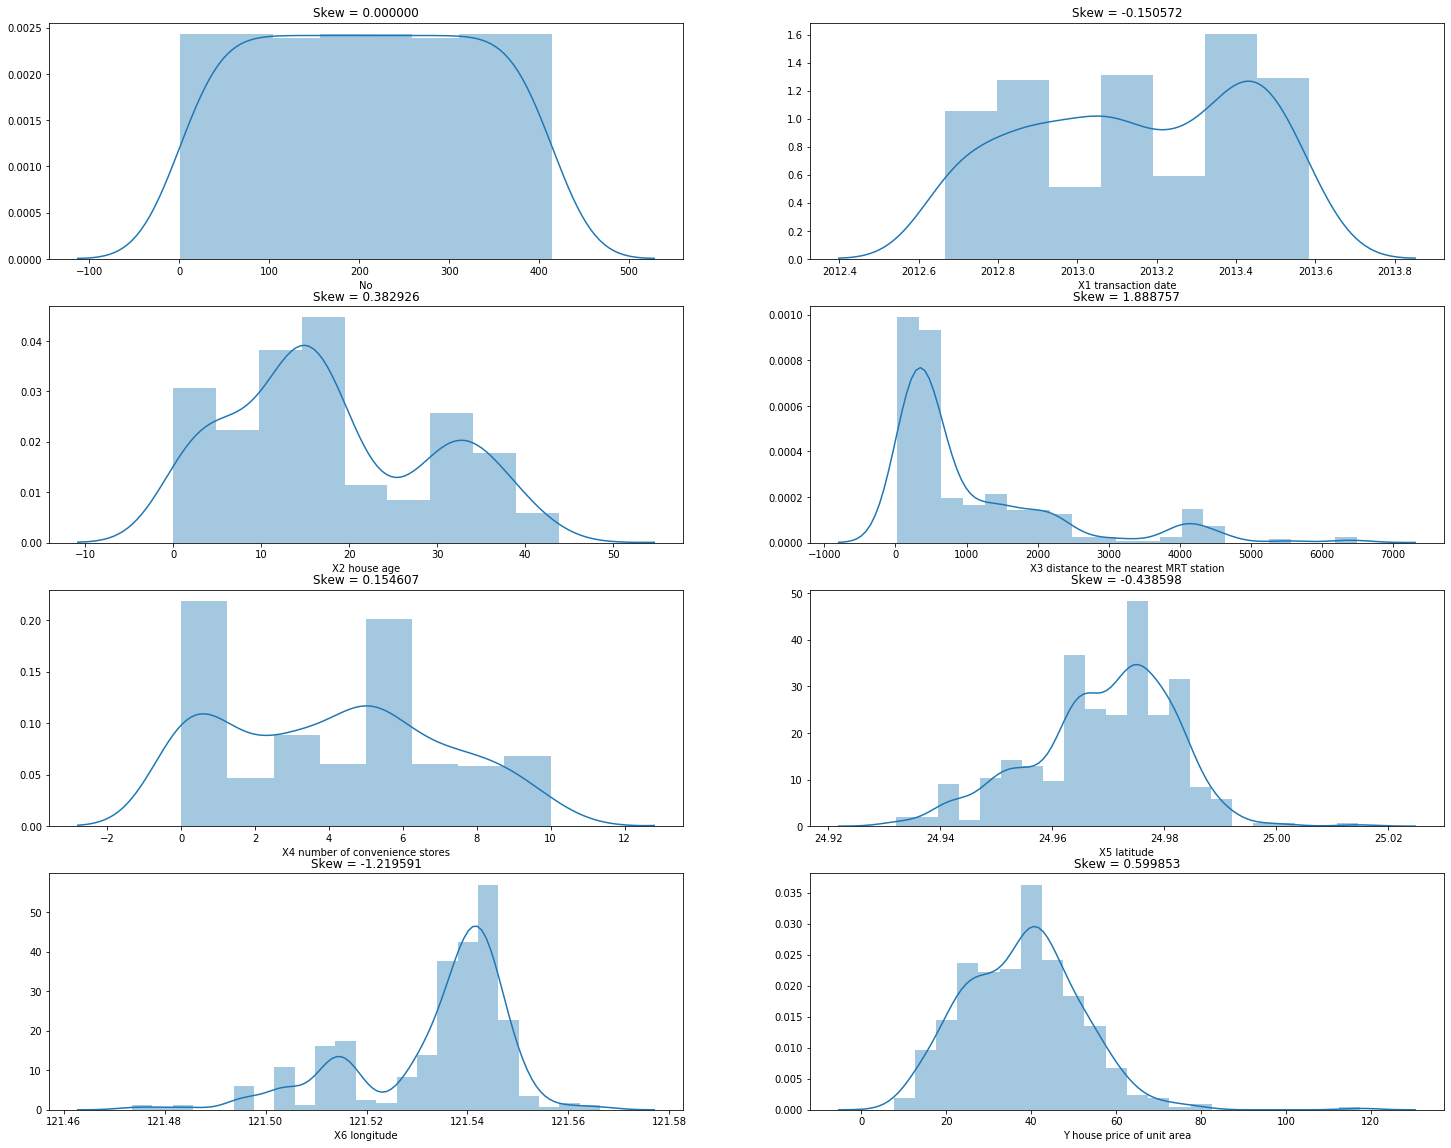

In [50]:
fig,ax=plt.subplots(nrows=4,ncols=2,figsize=(25,20))
for var,ax in zip(df.columns,ax.flatten()):
    ax=sns.distplot(df[var],ax=ax)
    ax.set_title('Skew = %f'%df[var].skew())
plt.show()

In [51]:
# we can observe slight skewness in all the features but with the Distance to the nearest MRT Station is high

In [52]:
# Reducing the skewness using transformation

In [55]:
df['X3 distance to the nearest MRT station'].skew()

1.8887565801256057

In [53]:
(np.sqrt(df['X3 distance to the nearest MRT station'])).skew()

1.073804569966851

In [54]:
(np.log(df['X3 distance to the nearest MRT station'])).skew()

0.05269434450696422

In [56]:
# As Log transform is more effective proceeding with reducing the skewness with log transform

In [419]:
df['Log_MRT_Dist'] = np.log(df['X3 distance to the nearest MRT station'])

In [59]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Log_MRT_Dist
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9,4.441225
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2,5.725527
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3,6.331474
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8,6.331474
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1,5.967603


In [420]:
df.drop('X3 distance to the nearest MRT station',axis=1,inplace=True)

In [421]:

df.head()

,No,X1 transaction date,X2 house age,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area,Log_MRT_Dist
0,1,2012.917,32.0,10,24.98298,121.54024,37.9,4.441225
1,2,2012.917,19.5,9,24.98034,121.53951,42.2,5.725527
2,3,2013.583,13.3,5,24.98746,121.54391,47.3,6.331474
3,4,2013.500,13.3,5,24.98746,121.54391,54.8,6.331474
4,5,2012.833,5.0,5,24.97937,121.54245,43.1,5.967603


### 4.	Summarize relationships among variables 

a.	Plot correlation plots. Which are the variables most correlated with Target? Which independent variables are correlated among themselves? Do you want to exclude some variables from the model based on this analysis? What other actions will you take?

b.	Plot all independent variables with the target. Are all relationships linear? If not, what steps would you take based on this information?

 Hint: based on your observations you may want to transform features or create additional features.


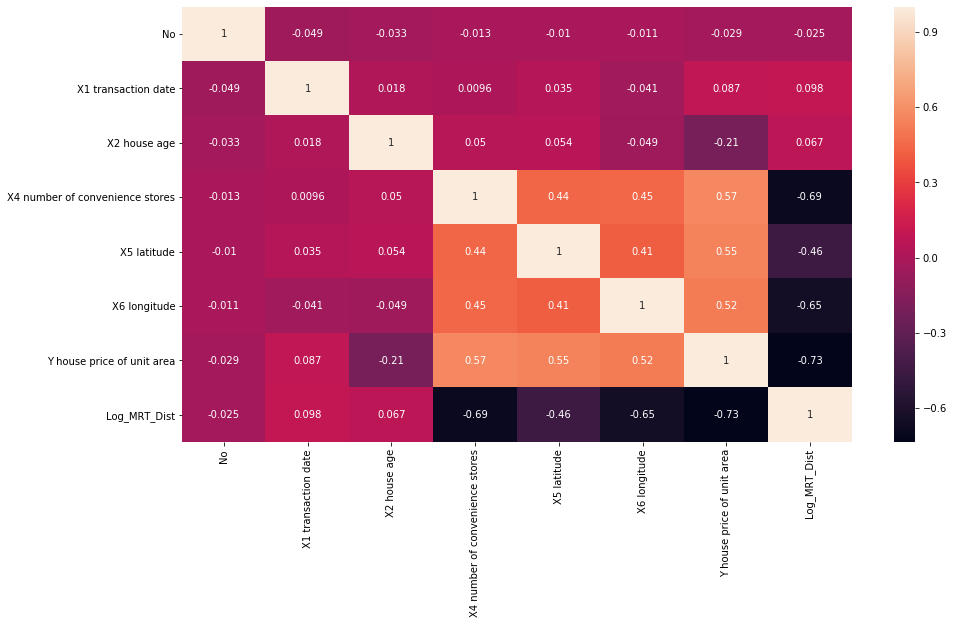

In [422]:
plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True)

In [423]:
# We can observe high corelation existing between House price of unit area and the Distance to the nearest MRT station

In [424]:
# We can also observe high corelation between number of convenience stores, latitude, longitude and 
#the Distance to the nearest MRT station 

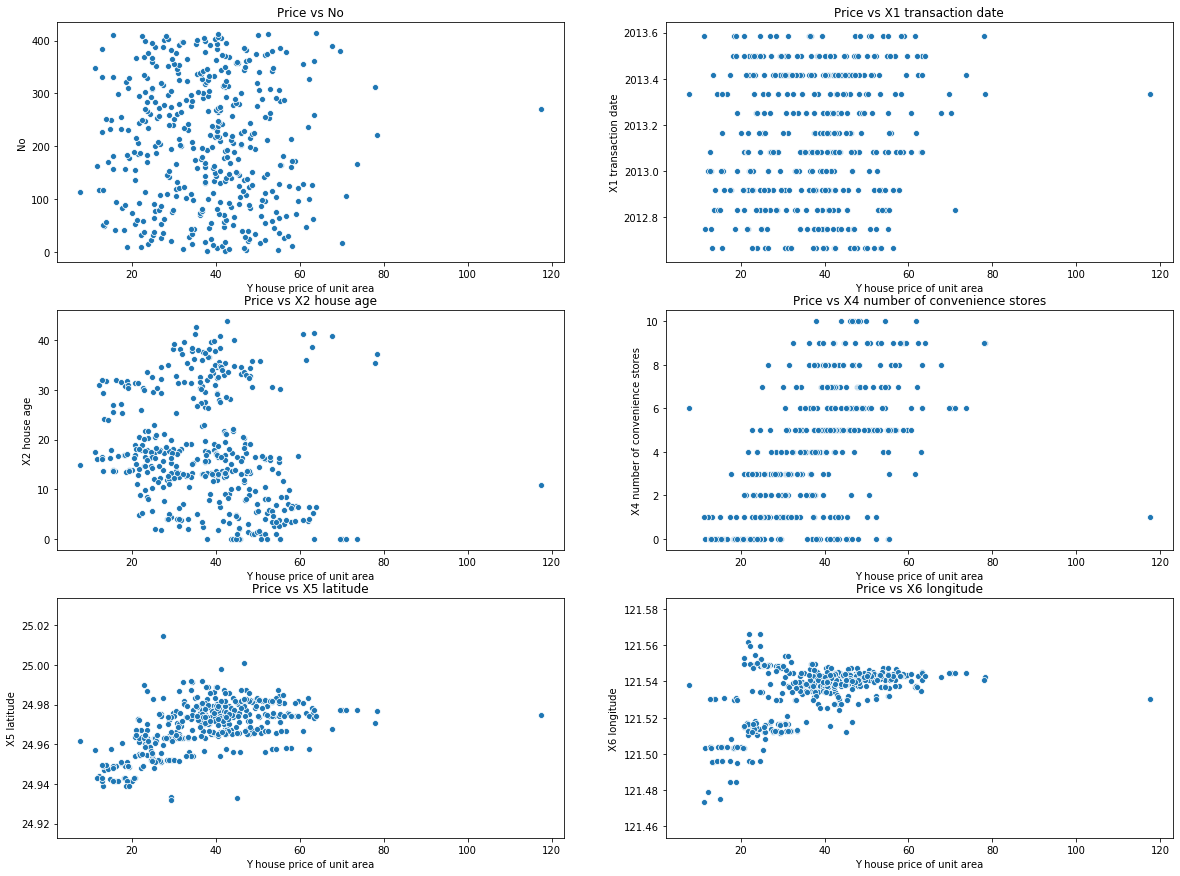

In [425]:
fig,ax =plt.subplots(nrows=3,ncols=2,figsize=(20,15))
for var,ax in zip(df.drop('Y house price of unit area',1).columns,ax.flatten()):
    if var in df.columns:
        sns.scatterplot(df['Y house price of unit area'],df[var],ax=ax)
        ax.set_title('Price vs %s'%var)

In [426]:
# Checking if the variables in the dataset are significant by developing a base model before dropping as 
# the values cannot be dropped just based on the collinearity

### 5.	Split dataset into train and test (70:30) 

a.	Are both train and test representative of the overall data? How would you ascertain this statistically?


In [427]:
# Dropping the index column as it is not required for model

In [428]:
x=df.drop(['Y house price of unit area','No'],axis=1)
y=df['Y house price of unit area']

In [429]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [430]:
x_train.shape

(289, 6)

In [431]:
y_train.shape

(289,)

In [432]:
x_test.shape

(125, 6)

In [433]:
y_test.shape

(125,)

### 6.	Fit a base model. Please write your key observations 

a.	What is the overall R2? Please comment on whether it is good or not.

b.	What is the adjusted R2? Is it different from R2? Why?

c.	Which variables are significant?

d.	Is there multicollinearity?

e.	Which other key model output parameters do you want to look at? 


In [434]:
# Fitting a base model

In [435]:
xc=sm.add_constant(x_train)
model1 = sm.OLS(y_train,xc).fit()
model1.summary()

/home/deploy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.658
Model:                                    OLS   Adj. R-squared:                  0.651
Method:                         Least Squares   F-statistic:                     90.62
Date:                        Sat, 24 Jul 2021   Prob (F-statistic):           7.22e-63
Time:                                16:07:56   Log-Likelihood:                -1014.2
No. Observations:                         289   AIC:                             2042.
Df Residuals:                             282   BIC:                             2068.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -1.881e+04   6272.373     -2.999      0.003   -3.12e+04   -6461.826
X1 transaction date                 6.3562      1.717      3.701      0.000       2.976       9.736
X2 house age                       -0.2116      0.043     -4.955      0.000      -0.296      -0.128
X4 number of convenience stores     0.3037      0.230      1.323      0.187      -0.148       0.755
X5 latitude                       301.7705     44.592      6.767      0.000     213.995     389.546
X6 longitude                      -11.8077     43.880     -0.269      0.788     -98.181      74.566
Log_MRT_Dist                       -7.3265      0.734     -9.988      0.000      -8.770      -5.883
==============================================================================
Omnibus:                      223.998   Durbin-Watson:                   2.148
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5195.113
Skew:                           2.867   Prob(JB):                         0.00
Kurtosis:                      22.964   Cond. No.                     2.63e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.63e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [436]:
xct=sm.add_constant(x_test)
model1 = sm.OLS(y_test,xct).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.647
Model:                                    OLS   Adj. R-squared:                  0.629
Method:                         Least Squares   F-statistic:                     36.04
Date:                        Sat, 24 Jul 2021   Prob (F-statistic):           1.64e-24
Time:                                16:07:56   Log-Likelihood:                -432.26
No. Observations:                         125   AIC:                             878.5
Df Residuals:                             118   BIC:                             898.3
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -2.774e+04   8313.871     -3.336      0.001   -4.42e+04   -1.13e+04
X1 transaction date                 6.6536      2.671      2.491      0.014       1.365      11.942
X2 house age                       -0.2740      0.065     -4.232      0.000      -0.402      -0.146
X4 number of convenience stores     0.4731      0.360      1.315      0.191      -0.239       1.185
X5 latitude                       241.7310     71.192      3.395      0.001     100.751     382.711
X6 longitude                       68.9711     56.743      1.216      0.227     -43.395     181.338
Log_MRT_Dist                       -5.5480      1.015     -5.467      0.000      -7.558      -3.538
==============================================================================
Omnibus:                       26.639   Durbin-Watson:                   1.773
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              147.441
Skew:                           0.448   Prob(JB):                     9.63e-33
Kurtosis:                       8.244   Cond. No.                     2.37e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [437]:
stats.f_oneway(df['Y house price of unit area'],y_train,y_test)

F_onewayResult(statistic=0.5510525595037644, pvalue=0.5765548414322041)

In [438]:
print(r2_score(y_train,y_pred_train))

0.6446300925252859


In [439]:
y_pred_test = model1.predict(xct)

In [440]:
print(r2_score(y_test,y_pred_test))

0.6469385474801712


In [441]:
# The R2 score is 0.64 in test which is not very high and depicts that the model's accuracy can be improved
# We can also observe that the model is performing similarly in both train and test model
# We don't observe any overfitting or underfitting

In [442]:
# The adj-r2 score is 0.65 in train and 0.62 in test which is a drop in accuracy by ~3%

In [443]:
# The adj-r2 score is different from r2 score as the adj-r2 score is an modified version of r2 score which adds 
# precision and reliability by considering the impact of independent variables and skew

In [444]:
# As we can observe that the p value, the features transaction date,house age, number of convenience store, latitude, distance to nearest MRT station are significant
# and  longitude is non significant

In [445]:
# The Durbin - Watson score is 2.1 in train 1.7 in Test which indicates that there exists only a little multi-collinearity

In [446]:
# Using VIF to check the multicollinearity

In [447]:
vif=pd.DataFrame()
vif['variables']=x_train.columns
vif['vif']=[variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]

In [448]:
vif

,variables,vif
0,X1 transaction date,3.616601e+07
1,X2 house age,3.410570e+00
2,X4 number of convenience stores,5.978290e+00
3,X5 latitude,5.344465e+06
4,X6 longitude,3.955980e+07
5,Log_MRT_Dist,8.098389e+01


In [449]:
# As we can observe that the p value of longitude is higher than the threshold, dropping the longitude

### 7.	How do you improve the accuracy of the model? Write clearly the changes that you will make before re-fitting the model. Fit the final model.
Please feel free to have any number of iterations to get to the final answer. Marks are awarded based on the quality of final model you are able to achieve. 

In [450]:
# As we can observe that the p value of longitude is higher than the threshold, dropping the longitude

In [451]:
df.drop('X6 longitude',axis=1,inplace=True)

In [452]:
df.head()

,No,X1 transaction date,X2 house age,X4 number of convenience stores,X5 latitude,Y house price of unit area,Log_MRT_Dist
0,1,2012.917,32.0,10,24.98298,37.9,4.441225
1,2,2012.917,19.5,9,24.98034,42.2,5.725527
2,3,2013.583,13.3,5,24.98746,47.3,6.331474
3,4,2013.500,13.3,5,24.98746,54.8,6.331474
4,5,2012.833,5.0,5,24.97937,43.1,5.967603


In [453]:
x1=df.drop(['Y house price of unit area','No'],axis=1)
y1=df['Y house price of unit area']

In [454]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x1,y1,test_size=0.3,random_state=42)

In [455]:
print(x_train1.shape,y_train1.shape,x_test1.shape,y_test1.shape)

(289, 5) (289,) (125, 5) (125,)


In [456]:
# Dropping the index column as it is not required for model

In [457]:
xt1=df.drop(['Y house price of unit area','No'],axis=1)
yt1=df['Y house price of unit area']
xc_te=sm.add_constant(x_train1)
model_te1 = sm.OLS(y_train1,xc_te).fit()
model2.summary()

/home/deploy/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.654
Model:                                    OLS   Adj. R-squared:                  0.649
Method:                         Least Squares   F-statistic:                     128.1
Date:                        Sat, 24 Jul 2021   Prob (F-statistic):           1.60e-90
Time:                                16:07:56   Log-Likelihood:                -1448.1
No. Observations:                         414   AIC:                             2910.
Df Residuals:                             407   BIC:                             2938.
Df Model:                                   6                                         
Covariance Type:                    nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -2.008e+04   2954.056     -6.798      0.000   -2.59e+04   -1.43e+04
No                                 -0.0044      0.003     -1.329      0.185      -0.011       0.002
X1 transaction date                 6.4795      1.427      4.541      0.000       3.674       9.285
X2 house age                       -0.2319      0.035     -6.566      0.000      -0.301      -0.162
X4 number of convenience stores     0.3542      0.191      1.854      0.065      -0.021       0.730
X5 latitude                       285.2475     36.891      7.732      0.000     212.727     357.768
Log_MRT_Dist                       -6.8534      0.513    -13.358      0.000      -7.862      -5.845
==============================================================================
Omnibus:                      259.826   Durbin-Watson:                   2.150
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             5201.232
Skew:                           2.285   Prob(JB):                         0.00
Kurtosis:                      19.752   Cond. No.                     1.51e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [478]:
xt1=df.drop(['Y house price of unit area','No'],axis=1)
yt1=df['Y house price of unit area']
xc_test=sm.add_constant(xt1)
model_test = sm.OLS(yt1,xc_test).fit()
model_test.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     Y house price of unit area   R-squared:                       0.652
Model:                                    OLS   Adj. R-squared:                  0.648
Method:                         Least Squares   F-statistic:                     153.1
Date:                        Sat, 24 Jul 2021   Prob (F-statistic):           2.95e-91
Time:                                16:09:54   Log-Likelihood:                -1449.0
No. Observations:                         414   AIC:                             2910.
Df Residuals:                             408   BIC:                             2934.
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                           -2.026e+04   2953.922     -6.857      0.000   -2.61e+04   -1.44e+04
X1 transaction date                 6.5584      1.427      4.596      0.000       3.753       9.364
X2 house age                       -0.2307      0.035     -6.529      0.000      -0.300      -0.161
X4 number of convenience stores     0.3618      0.191      1.892      0.059      -0.014       0.738
X5 latitude                       285.8073     36.923      7.741      0.000     213.224     358.391
Log_MRT_Dist                       -6.8280      0.513    -13.305      0.000      -7.837      -5.819
==============================================================================
Omnibus:                      255.989   Durbin-Watson:                   2.141
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4943.593
Skew:                           2.250   Prob(JB):                         0.00
Kurtosis:                      19.320   Cond. No.                     1.50e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.5e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [459]:
# We can observe a slight improvement in the r2 value after dropping the Longitude column but it can further be developed
# We can also observe that the Durbin-Watson score is slightly increased showing that Longitude was collinear

In [460]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [461]:
ss = StandardScaler()
mm = MinMaxScaler(feature_range=(0,1))

In [462]:
x_train1=ss.fit_transform(x_train1)

In [463]:
x_train1 = mm.fit_transform(x_train1)

In [464]:
x_test1 = ss.fit_transform(x_test1)
x_test1=mm.fit_transform(x_test1)

In [465]:
from sklearn.ensemble import RandomForestRegressor

In [466]:
reg = RandomForestRegressor()

In [467]:
reg1 = reg.fit(x_train1,y_train1)

In [468]:
reg2 = reg.fit(x_test1,y_test1)

In [469]:
reg1.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [470]:
reg2.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [471]:
y_pred = reg.predict(x_test1)

### 8.	Summarize as follows
1.	Summarize the overall fit of the model and list down the measures to prove that it is a good model
2.	Write down a business interpretation/explanation of the model – which variables are affecting the target the most and explain the relationship. Feel free to use charts or graphs to explain.
3.	What changes from the base model had the most affect on model performance
4.	What are the key risks to your results and interpretation


In [472]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train1,y_train1)

LinearRegression()

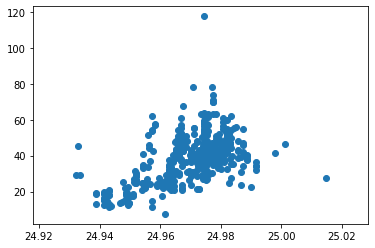

In [481]:
plt.scatter(x=df['X5 latitude'],y=df['Y house price of unit area'])


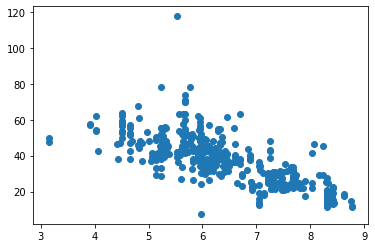

In [482]:
plt.scatter(x=df['Log_MRT_Dist'],y=df['Y house price of unit area'])


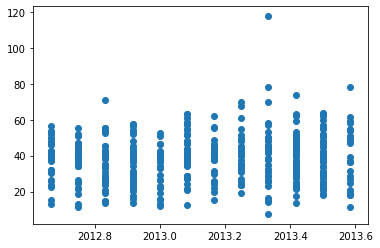

In [484]:
plt.scatter(x=df['X1 transaction date'],y=df['Y house price of unit area'])


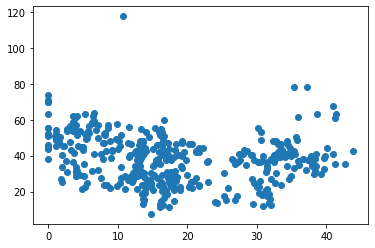

In [483]:
plt.scatter(x=df['X2 house age'],y=df['Y house price of unit area'])


The removal of highly skewed Nearest MRT station and removal of insignificant variable Longitude resulted in 
betterment of model

In [474]:
# The Durbin-Watson Score is >2
# The High Value of Jaraque-Bara indicates that data is normally distributed
# The model developed has 65% accuracy

# From the Test Model , it is found that
Y house price of unit area = 6.5 * (X1 transaction date) -0.2 (X2 house age) + 0.36 (X4 number of convenience stores) + 285 (X5 latitude) - 6.8(Log_MRT_Dist)

As the Age and Distance from the nearest MRT station increases , Price decreases
Similarly as the Transaction Date increases and Number of conveniance store near by increases Price increases
